<a href="https://colab.research.google.com/github/Eviriawan/E1E122012_EVIRIAWAN/blob/main/E1E122012_EVIRIAWAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#baca file csv
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [2]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
X = df.drop(['name'], axis=1)

X.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# ubah data kategorik menjadi data numerik
df['fuel'].replace(['Petrol','Diesel','CNG','LPG','Electric','Petrol'], [0,1,2,3,4,5], inplace=True)

In [5]:
# ubah data kategorik menjadi data numerik
df['seller_type'].replace(['Individual', 'Dealer','Trustmark Dealer'], [0,1,2], inplace=True)

In [6]:
# ubah data kategorik menjadi data numerik
df['transmission'].replace(['Manual', 'Automatic'], [0,1], inplace=True)

In [7]:
# ubah data kategorik menjadi data numerik
df['owner'].replace(['First Owner', 'Second Owner','Fourth & Above Owner','Third Owner','Test Drive Car'], [0,1,2,3,4], inplace=True)

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [9]:
X = df.drop(['name', 'year'], axis=1)

X.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,0,0,0,0
1,135000,50000,0,0,0,0
2,600000,100000,1,0,0,0
3,250000,46000,0,0,0,0
4,450000,141000,1,0,0,1


In [10]:
from sklearn.cluster import KMeans

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

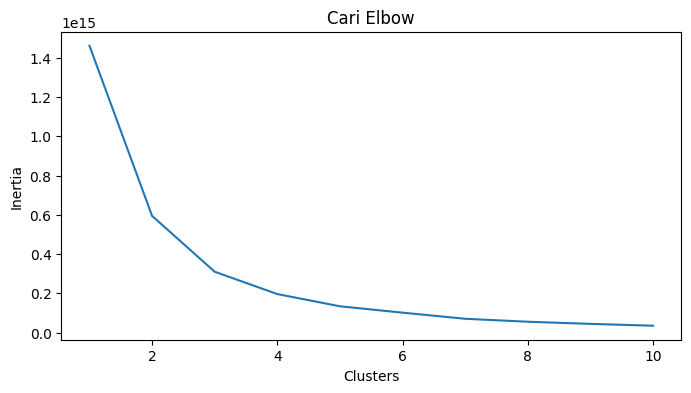

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [12]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
X.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner
0,60000,70000,0,0,0,0
1,135000,50000,0,0,0,0
2,600000,100000,1,0,0,0
3,250000,46000,0,0,0,0
4,450000,141000,1,0,0,1


In [14]:
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

In [15]:
X.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Labels
0,60000,70000,0,0,0,0,0
1,135000,50000,0,0,0,0,0
2,600000,100000,1,0,0,0,2
3,250000,46000,0,0,0,0,0
4,450000,141000,1,0,0,1,2


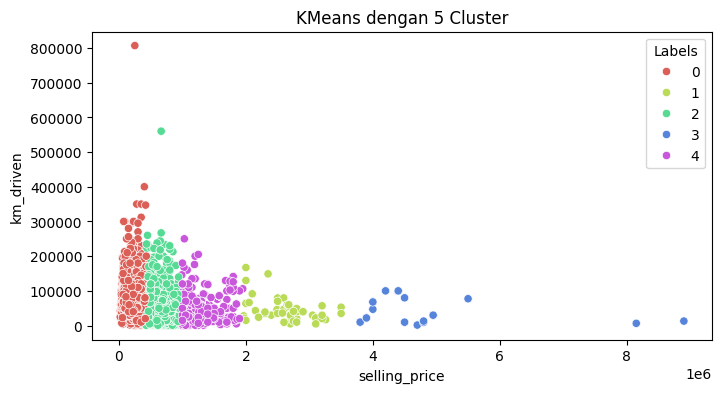

In [16]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['selling_price'], y=X['km_driven'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

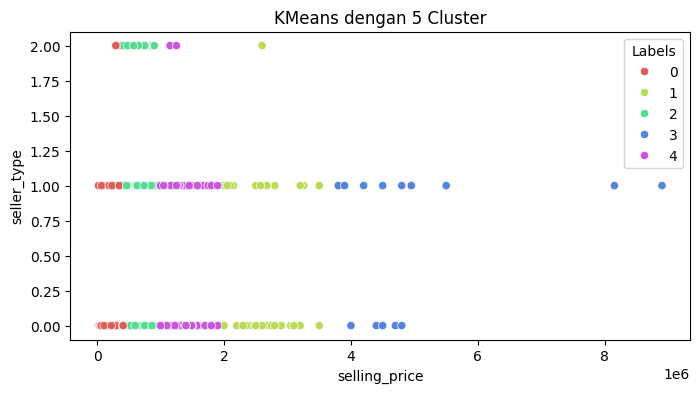

In [17]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['selling_price'], y=X['seller_type'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

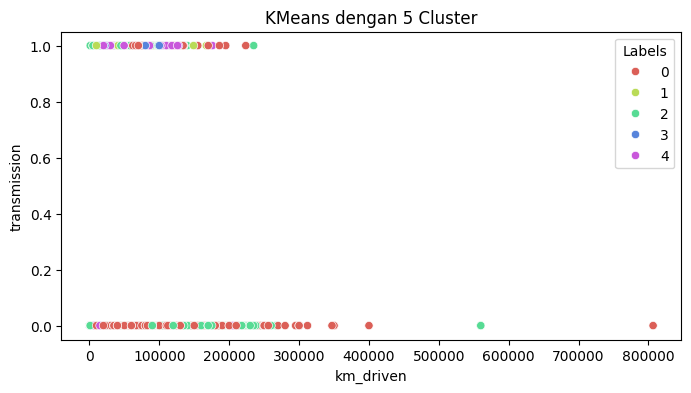

In [18]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['km_driven'], y=X['transmission'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()